2. Data Wrangling II
Create an “Academic performance” dataset of students and perform the following operations using
Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or
inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable
techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this
transformation should be one of the following reasons: to change the scale for better
understanding of the variable, to convert a non-linear relation into a linear one, or to
decrease the skewness and convert the distribution into a normal distribution. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("academic_performance_dataset.csv")  # Make sure it's in your working directory

print("Original Dataset (First 10 rows):\n", df.head(10))

Original Dataset (First 10 rows):
    Student_ID    Name  Math_Score  Science_Score  Attendance_Percentage  \
0           1    John        85.0           80.0                   95.0   
1           2   Alice        90.0           85.0                   87.0   
2           3     Bob        78.0            NaN                   78.0   
3           4   Daisy         NaN           76.0                   85.0   
4           5   Ethan        88.0           82.0                   90.0   
5           6   Fiona        95.0          110.0                   92.0   
6           7  George       200.0           75.0                    NaN   
7           8  Hannah        70.0           88.0                   88.0   
8           9     Ian        92.0           91.0                  150.0   
9          10    Jane        89.0           87.0                   85.0   

  Final_Grade  
0           A  
1           A  
2           B  
3           C  
4           A  
5           A  
6           F  
7          

In [4]:
# 1. Handle missing values
print("\nMissing values before handling:\n", df.isnull().sum())

# Fill missing numeric columns with mean (Avoid inplace=True)
for col in ['Math_Score', 'Science_Score', 'Attendance_Percentage']:
    df[col] = df[col].fillna(df[col].mean())  # Directly assign the filled column back

print("\nMissing values after handling:\n", df.isnull().sum())



Missing values before handling:
 Student_ID               0
Name                     0
Math_Score               0
Science_Score            0
Attendance_Percentage    0
Final_Grade              0
dtype: int64

Missing values after handling:
 Student_ID               0
Name                     0
Math_Score               0
Science_Score            0
Attendance_Percentage    0
Final_Grade              0
dtype: int64


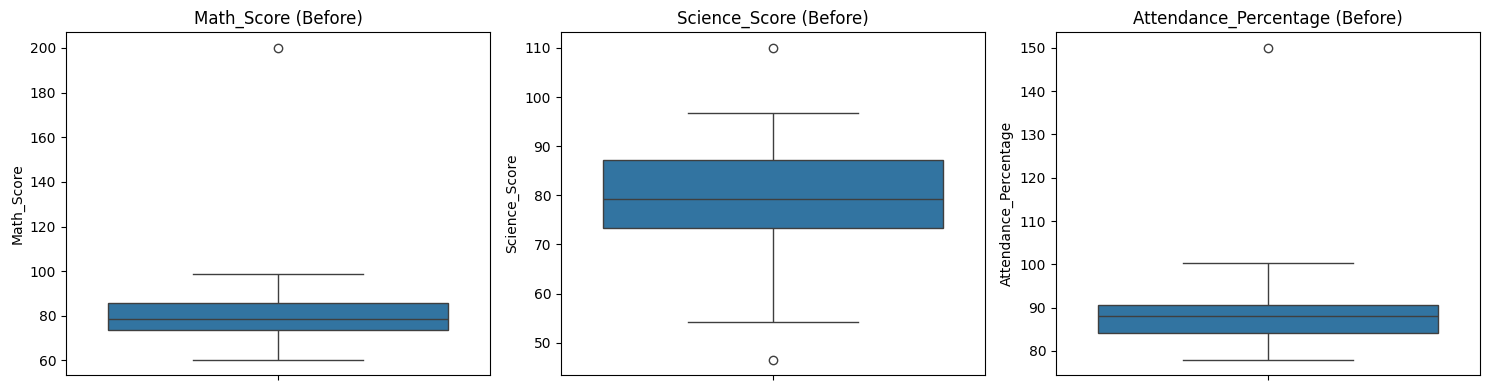

In [5]:
# 2. Visualize data before treating outliers
plt.figure(figsize=(15, 4))
for i, col in enumerate(['Math_Score', 'Science_Score', 'Attendance_Percentage']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f"{col} (Before)")
plt.tight_layout()
plt.show()

In [6]:
# 3. Handle outliers using IQR
def handle_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    median = df[col].median()
    df[col] = np.where((df[col] < lower) | (df[col] > upper), median, df[col])

for col in ['Math_Score', 'Science_Score', 'Attendance_Percentage']:
    handle_outliers(df, col)

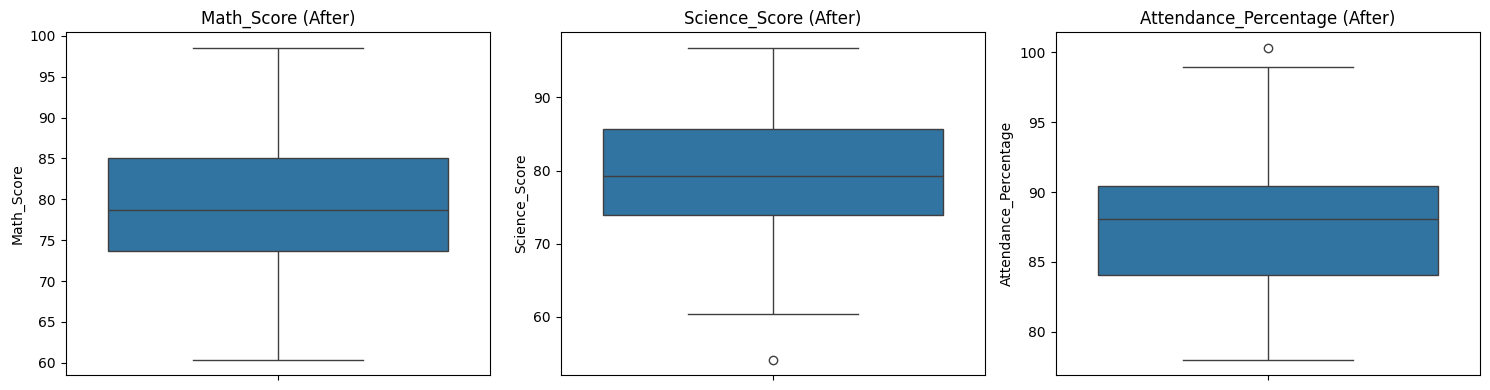

In [7]:
# 4. Visualize data after treating outliers
plt.figure(figsize=(15, 4))
for i, col in enumerate(['Math_Score', 'Science_Score', 'Attendance_Percentage']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f"{col} (After)")
plt.tight_layout()
plt.show()

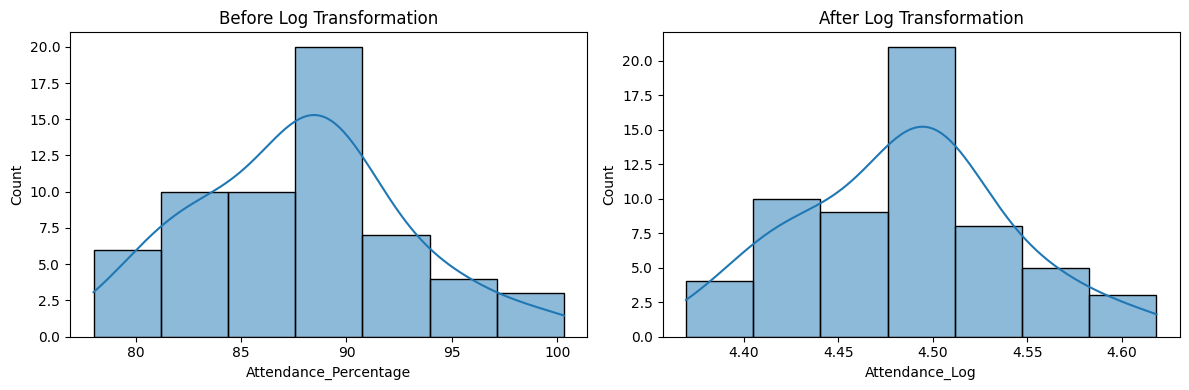

In [ ]:
# 5. Log Transformation on Attendance_Percentage
df['Attendance_Log'] = np.log1p(df['Attendance_Percentage'])

# Skewness comparison
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['Attendance_Percentage'], kde=True)
plt.title("Before Log Transformation")

plt.subplot(1, 2, 2)
sns.histplot(df['Attendance_Log'], kde=True)
plt.title("After Log Transformation")

plt.tight_layout()
plt.show()
# 5. Log Transformation on Attendance_Percentage
df['Attendance_Log'] = np.log1p(df['Attendance_Percentage'])

# Skewness comparison
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['Attendance_Percentage'], kde=True)
plt.title("Before Log Transformation")

plt.subplot(1, 2, 2)
sns.histplot(df['Attendance_Log'], kde=True)
plt.title("After Log Transformation")

plt.tight_layout()
plt.show()


In [9]:
# 6. Final output
print("\nFinal Cleaned Dataset (First 10 rows):")
print(df.head(10))


Final Cleaned Dataset (First 10 rows):
   Student_ID    Name  Math_Score  Science_Score  Attendance_Percentage  \
0           1    John   85.000000      80.000000              95.000000   
1           2   Alice   90.000000      85.000000              87.000000   
2           3     Bob   78.000000      79.401017              78.000000   
3           4   Daisy   80.919831      76.000000              85.000000   
4           5   Ethan   88.000000      82.000000              90.000000   
5           6   Fiona   95.000000      79.280508              92.000000   
6           7  George   78.730000      75.000000              88.816949   
7           8  Hannah   70.000000      88.000000              88.000000   
8           9     Ian   92.000000      91.000000              88.150000   
9          10    Jane   89.000000      87.000000              85.000000   

  Final_Grade  Attendance_Log  
0           A        4.564348  
1           A        4.477337  
2           B        4.369448  
3     

Practical: Data Wrangling – II (Using Python)**
Objective:**
To clean and transform a custom-built “Academic Performance” dataset using Python. The focus is on detecting and handling missing values, treating outliers, and applying transformations to improve the distribution and scale of variables.
Dataset Description:**
- A custom dataset named `academic_performance_dataset.csv` is used.
- It contains student-level data including:
  - `Math_Score`: Marks in Mathematics.
  - `Science_Score`: Marks in Science.
  - `Attendance_Percentage`: Overall attendance percentage.
 Handling Missing Values:**
 a) Checking for missing values:
```python
df.isnull().sum()
 This displays how many missing values each column contains.
b) Handling missing values:
```python
df[col] = df[col].fillna(df[col].mean())
- Missing values in numeric columns (`Math_Score`, `Science_Score`, `Attendance_Percentage`) are filled with the **mean** of the respective column.
- This is a simple and widely used technique when missing values are randomly distributed.
2. Outlier Detection and Treatment:**
 a) Visualizing Outliers:
```python
sns.boxplot(y=df[col])
 A boxplot is used to visually detect outliers. Points outside the whiskers are considered potential outliers.
 b) Treating Outliers using the IQR Method:
```python
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
- **Interquartile Range (IQR)** is used to detect and cap extreme values.
- Outliers are replaced with the **median** of the column to preserve central tendency and reduce the impact of skewed data.
3. Data Transformation:**
a) Log Transformation:
```python
df['Attendance_Log'] = np.log1p(df['Attendance_Percentage'])
- Log transformation is applied to reduce **skewness** and **normalize** the distribution.
- `np.log1p()` is used instead of `log()` to avoid issues with zero values.
 b) Visualizing Transformation:
```python
sns.histplot(df['Attendance_Percentage'], kde=True)
sns.histplot(df['Attendance_Log'], kde=True)
- Before and after histograms show how the transformation changes the shape of the distribution (more bell-shaped after transformation).
🔹 **Conclusion:**
- Missing values were successfully filled using the **mean imputation** method.
- Outliers were treated using the **IQR method**, replacing extreme values with the **median**.
- A **logarithmic transformation** was applied to the `Attendance_Percentage` variable to reduce skewness and improve normality.
 **Learning Outcomes:**
- Ability to detect and treat missing values using imputation techniques.
- Understanding and application of outlier detection with IQR.
- Proficiency in using transformation techniques for data normalization and improving model performance.